                       **LogFile Analysis**

> sample document logfile.txt
https://drive.google.com/drive/folders/1KF1UwyfwiCt0aHJ08uRQnqrhdy3lxyyc?usp=sharing



In [20]:
d=open('/content/logfile.txt')

readlines( ) and read().spiltlines() both return a list

readlines() is followed by a \n
read().splitlines() will not have \n at the end

In [21]:
type(d)

_io.TextIOWrapper

In [22]:
import re
b="codegnan is in vijayawada"
n=re.split('n',b)#where ever we have n it is replacing with b
print(n)

['codeg', 'a', ' is i', ' vijayawada']


In [23]:
import re #regular exp
import csv #coma sep values -->takes less memory
import os
c=[]
b=["ip","time stamp","timezone","request","slash","http","status"]
with open('logfile.txt') as f:
  lines=f.read().splitlines() #lines is a list
  for line in lines: #as line is list so i can use for
    line=line.replace(",","")
    line=line.replace("[","")
    line=line.replace("]","")
    line=line.replace('"','')
    line=line.replace('-','')
    a=re.split('\s+',line)[:7]
    c.append(a)


In [24]:
with open('logfile.csv','w') as f:
  #csv.writer to write data into the file logfile.csv
  write=csv.writer(f)#just tells into which file the text should be written
  #writerow(),writerows() write data to csv file
  write.writerow(b)
  write.writerows(c)


In [25]:
import pandas as pd
data=pd.read_csv('logfile.csv')

In [26]:
data.head(10)

,ip,time stamp,timezone,request,slash,http,status
0,103.44.12.218,19/Mar/2021:14:27:44,0,POST,/exam/168/check/1/6/16/16/,HTTP/1.1,200.0
1,103.44.12.218,19/Mar/2021:14:27:44,0,GET,/exam/login/?next=/exam/167/check/1/6/16/16/,HTTP/1.1,200.0
2,103.44.12.218,19/Mar/2021:14:27:44,0,POST,/exam/168/check/1/6/16/16/,HTTP/1.1,200.0
3,103.44.12.218,19/Mar/2021:14:27:45,0,POST,/exam/168/check/1/6/16/16/,HTTP/1.1,200.0
4,103.44.12.218,19/Mar/2021:14:27:45,0,POST,/exam/169/check/1/6/16/16/,HTTP/1.1,200.0
5,103.44.12.218,19/Mar/2021:14:27:45,0,POST,/exam/164/check/1/6/16/16/,HTTP/1.1,200.0
6,103.44.12.218,19/Mar/2021:14:27:45,0,POST,/exam/165/check/1/6/16/16/,HTTP/1.1,200.0
7,103.44.12.218,19/Mar/2021:14:27:45,0,POST,/exam/168/check/1/6/16/16/,HTTP/1.1,200.0
8,103.44.12.218,19/Mar/2021:14:27:45,0,POST,/exam/163/check/1/6/16/16/,HTTP/1.1,200.0
9,103.44.12.218,19/Mar/2021:14:27:45,0,POST,/exam/163/check/1/6/16/16/,HTTP/1.1,200.0


In [27]:
#to get the count of missing values in a dataframe
data.isnull().sum()

ip            0
time stamp    0
timezone      0
request       0
slash         0
http          9
status        9
dtype: int64

In [28]:
#to get the info about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5183 entries, 0 to 5182
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ip          5183 non-null   object 
 1   time stamp  5183 non-null   object 
 2   timezone    5183 non-null   int64  
 3   request     5183 non-null   object 
 4   slash       5183 non-null   object 
 5   http        5174 non-null   object 
 6   status      5174 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 283.6+ KB


In [29]:
#to remove null
data.dropna(inplace=True) 

In [30]:
data.isnull().sum()

ip            0
time stamp    0
timezone      0
request       0
slash         0
http          0
status        0
dtype: int64

In [31]:
#convert status into int and timestamp into
data['status']=data['status'].astype(int)


In [32]:
data['status'].tail(10)

5173    200
5174    200
5175    200
5176    200
5177    200
5178    302
5179    200
5180    200
5181    200
5182    200
Name: status, dtype: int64

In [33]:
data['time stamp']=pd.to_datetime(data['time stamp'],format='%d/%b/%Y:%H:%M:%S')

In [34]:
data['time stamp'].head(20)

0    2021-03-19 14:27:44
1    2021-03-19 14:27:44
2    2021-03-19 14:27:44
3    2021-03-19 14:27:45
4    2021-03-19 14:27:45
5    2021-03-19 14:27:45
6    2021-03-19 14:27:45
7    2021-03-19 14:27:45
8    2021-03-19 14:27:45
9    2021-03-19 14:27:45
10   2021-03-19 14:27:45
11   2021-03-19 14:27:45
12   2021-03-19 14:27:45
13   2021-03-19 14:27:45
14   2021-03-19 14:27:45
15   2021-03-19 14:27:46
16   2021-03-19 14:27:46
17   2021-03-19 14:27:46
18   2021-03-19 14:27:46
19   2021-03-19 14:27:46
Name: time stamp, dtype: datetime64[ns]

In [35]:
data['status'].value_counts()#to get each type occurence

200    3724
404     534
403     450
302     243
500     175
499      42
182       2
400       2
405       1
301       1
Name: status, dtype: int64

In [36]:
#concat function--> concatinate panda funs 
pd.concat([data['status'].value_counts().rename('count'),
          data['status'].value_counts(normalize=True).mul(100).rename('percentage status')],
          axis=1)

,count,percentage status
200,3724,71.975261
404,534,10.320835
403,450,8.697333
302,243,4.696560
500,175,3.382296
499,42,0.811751
182,2,0.038655
400,2,0.038655
405,1,0.019327
301,1,0.019327


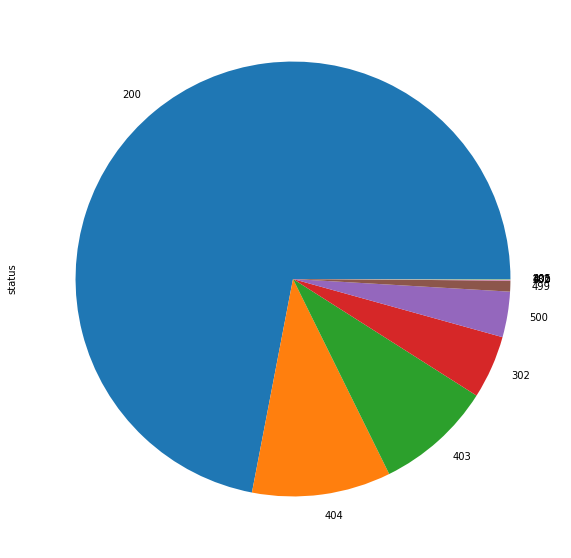

In [37]:
#plot pie chart for the given data
data.status.value_counts().plot.pie(figsize=(10,10))